Con el objetivo de buscar potenciales fármacos contra el cáncer dentro de la base de datos ¿Cuál es el mejor agrupamiento de las moléculas disponibilizadas?



1. Emplea modelos no supervisados (Kmeans, DBSCAN, PCA, etc) y figuras (elbow plot, diagrama de silhouette) según convenga.

2. ¿Cuántas dimensiones son requeridas para preservar el 95% de la varianza?

3. ¿Cómo usarías KMeans para reducir la dimensionalidad?

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv("/content/UML_2024.csv")
df

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,2,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,171647,138.149998,1.2309,11,3,1,0,0,0,0,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,181450,157.559997,1.6036,8,4,1,0,0,0,0,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,53393977,396.438991,8.6718,30,6,0,0,0,0,0,...,0,0,71.06,16.429361,1.082601,14.175829,25.262222,13.420118,260,248
296,51136451,356.373991,5.9132,26,6,2,2,0,0,0,...,0,0,93.06,11.376300,0.969437,10.734955,22.290809,9.972299,226,223
297,46946664,410.465990,8.5972,32,6,1,1,0,0,0,...,0,0,82.06,16.457952,0.969098,15.982759,26.253902,14.210000,276,272
298,46898924,425.412990,6.8134,28,8,1,2,1,0,0,...,0,0,122.19,15.917241,0.970202,15.406104,27.246094,14.302721,258,261


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,300.0,3.601528e+07,4.067521e+07,1046.000000,5.281500e+06,1.388871e+07,6.880700e+07,1.560257e+08
Molecular_weight,300.0,3.348073e+02,1.429548e+02,122.115432,1.858750e+02,3.523860e+02,4.567110e+02,9.176300e+02
LogP,300.0,7.927830e+00,6.127177e+00,-1.765100,2.399200e+00,6.627100e+00,1.357108e+01,4.037570e+01
Number_of_HBA_1,300.0,3.013333e+01,1.827280e+01,7.000000,1.300000e+01,2.700000e+01,4.800000e+01,1.180000e+02
Number_of_HBA_2,300.0,4.460000e+00,1.224772e+00,2.000000,4.000000e+00,4.000000e+00,5.000000e+00,9.000000e+00
Number_of_HBD_1,300.0,1.433333e+00,8.648983e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
Number_of_HBD_2,300.0,1.493333e+00,1.169551e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Number_of_acidic_groups,300.0,3.233333e-01,5.225250e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Number_of_aliphatic_OH_groups,300.0,5.533333e-01,9.255689e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
Number_of_basic_groups,300.0,4.333333e-02,2.858811e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00


In [70]:
df.columns

Index(['cid', 'Molecular_weight', 'LogP', 'Number_of_HBA_1', 'Number_of_HBA_2',
       'Number_of_HBD_1', 'Number_of_HBD_2', 'Number_of_acidic_groups',
       'Number_of_aliphatic_OH_groups', 'Number_of_basic_groups',
       'Fraction_of_rotatable_bonds', 'Number_of_heavy_bonds',
       'Number_of_heterocycles', 'Number_of_hydrophobic_groups',
       'MolarRefractivity', 'Number_of_atoms', 'Number_of_halogen_atoms',
       'Number_of_B_atoms', 'Number_of_Br_atoms', 'Number_of_Cl_atoms',
       'Number_of_I_atoms', 'Number_of_F_atoms', 'Number_of_N_atoms',
       'Number_of_O_atoms', 'Number_of_P_atoms', 'Number_of_S_atoms',
       'Number_of_bonds', 'Number_of_NO2_groups', 'Number_of_SO_groups',
       'Number_of_OSO_groups', 'Number_of_SO2_groups', 'PolarSurfaceArea',
       'Geometrical_diameter', 'Geometrical_radius',
       'Geometrical_shape_coefficient', 'Kier_shape_1', 'Kier_shape_2',
       'Zagreb_group_index_1', 'Zagreb_group_index_2'],
      dtype='object')

Se procede a eliminar las columnas que tienen valores igual a 0 como

In [71]:
delete= ['Number_of_hydrophobic_groups', "Number_of_B_atoms","Number_of_SO_groups","Number_of_OSO_groups"]

In [72]:
df1 = df.drop(delete, axis=1)


Podemos ver que no hay nulos y que todos son numéricos, ahora veremos si se pueden eliminar columnas con la matriz de correlación


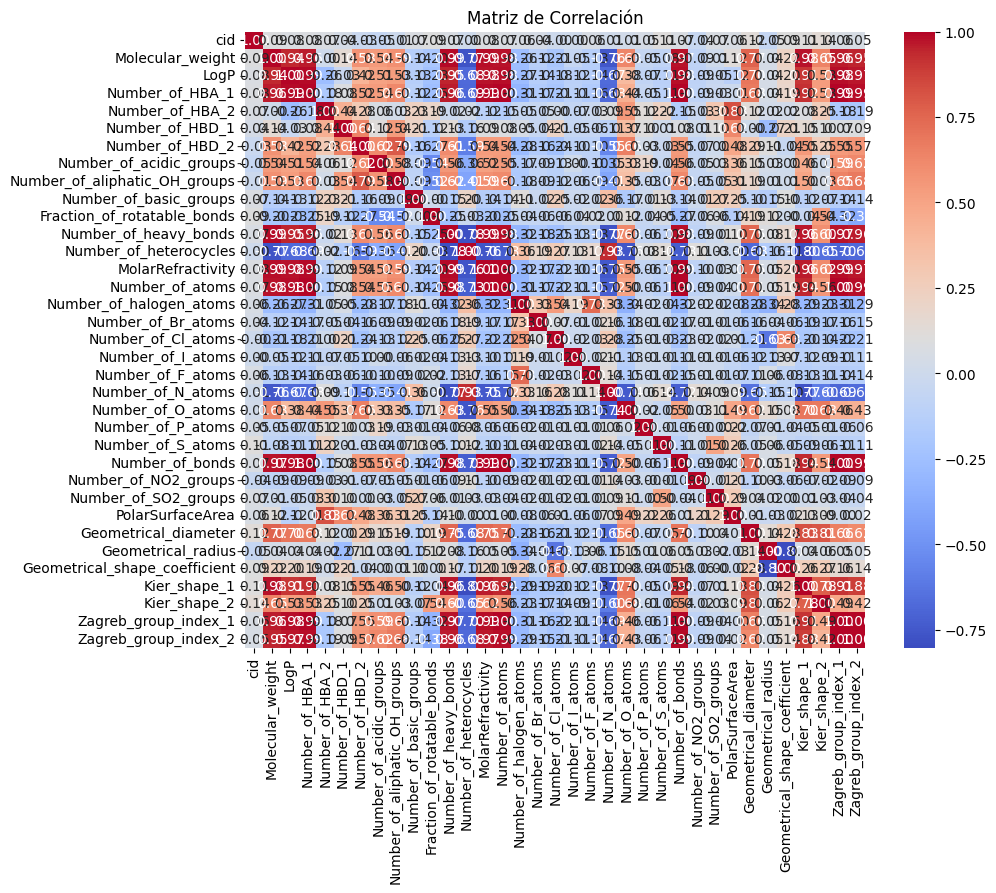

In [73]:
# Suponiendo que df es tu DataFrame
correlation_matrix = df1.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añadir título
plt.title('Matriz de Correlación')

# Mostrar el mapa de calor
plt.show()

In [74]:
df1

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_NO2_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,2,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,171647,138.149998,1.2309,11,3,1,0,0,0,0,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,181450,157.559997,1.6036,8,4,1,0,0,0,0,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,53393977,396.438991,8.6718,30,6,0,0,0,0,0,...,0,0,71.06,16.429361,1.082601,14.175829,25.262222,13.420118,260,248
296,51136451,356.373991,5.9132,26,6,2,2,0,0,0,...,0,0,93.06,11.376300,0.969437,10.734955,22.290809,9.972299,226,223
297,46946664,410.465990,8.5972,32,6,1,1,0,0,0,...,0,0,82.06,16.457952,0.969098,15.982759,26.253902,14.210000,276,272
298,46898924,425.412990,6.8134,28,8,1,2,1,0,0,...,0,0,122.19,15.917241,0.970202,15.406104,27.246094,14.302721,258,261


In [75]:
import pandas as pd

# Suponiendo que df es tu DataFrame
correlation_matrix = df1.corr()

# Encontrar las columnas con correlación mayor a 0.75
high_correlation_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            high_correlation_cols.add(colname)

# Eliminar las columnas con alta correlación del DataFrame original
df2 = df1.drop(high_correlation_cols, axis=1)


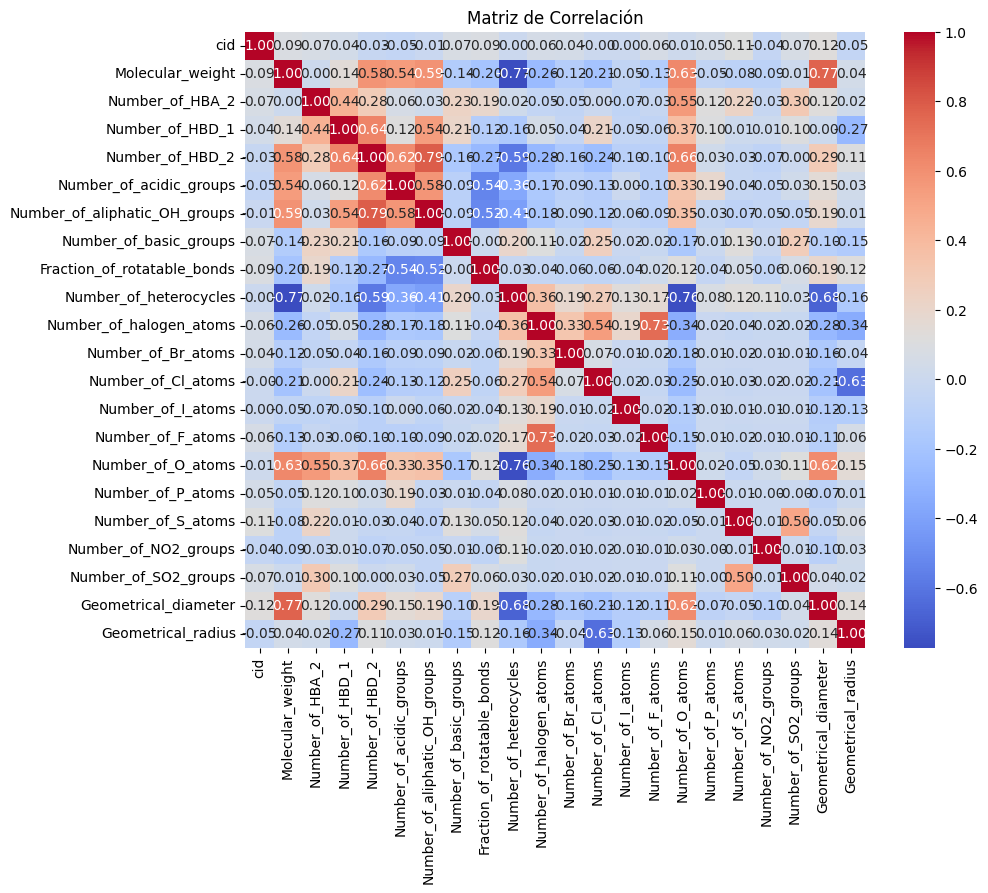

In [76]:
# Suponiendo que df es tu DataFrame
correlation_matrix = df2.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añadir título
plt.title('Matriz de Correlación')

# Mostrar el mapa de calor
plt.show()

In [77]:
df2


,cid,Molecular_weight,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,Fraction_of_rotatable_bonds,Number_of_heterocycles,...,Number_of_Cl_atoms,Number_of_I_atoms,Number_of_F_atoms,Number_of_O_atoms,Number_of_P_atoms,Number_of_S_atoms,Number_of_NO2_groups,Number_of_SO2_groups,Geometrical_diameter,Geometrical_radius
0,1046,123.114998,4,1,0,0,0,0,0.111111,1,...,0,0,0,1,0,0,0,0,7.031056,1.007808
1,124704,165.155998,6,2,0,0,0,2,0.166667,1,...,0,0,0,1,0,0,0,0,9.169663,1.003795
2,171646,265.053997,3,1,0,1,0,0,0.100000,1,...,0,1,0,1,0,0,0,0,7.029373,0.161433
3,171647,138.149998,3,1,0,0,0,0,0.100000,1,...,0,0,0,1,0,0,0,0,7.067147,1.006808
4,181450,157.559997,4,1,0,0,0,0,0.100000,1,...,1,0,0,1,0,0,0,0,7.646398,1.007958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,53393977,396.438991,6,0,0,0,0,0,0.333333,0,...,0,0,0,6,0,0,0,0,16.429361,1.082601
296,51136451,356.373991,6,2,2,0,0,0,0.222222,0,...,0,0,0,6,0,0,0,0,11.376300,0.969437
297,46946664,410.465990,6,1,1,0,0,0,0.354839,0,...,0,0,0,6,0,0,0,0,16.457952,0.969098
298,46898924,425.412990,8,1,2,1,0,0,0.343750,0,...,0,0,0,8,0,0,0,0,15.917241,0.970202


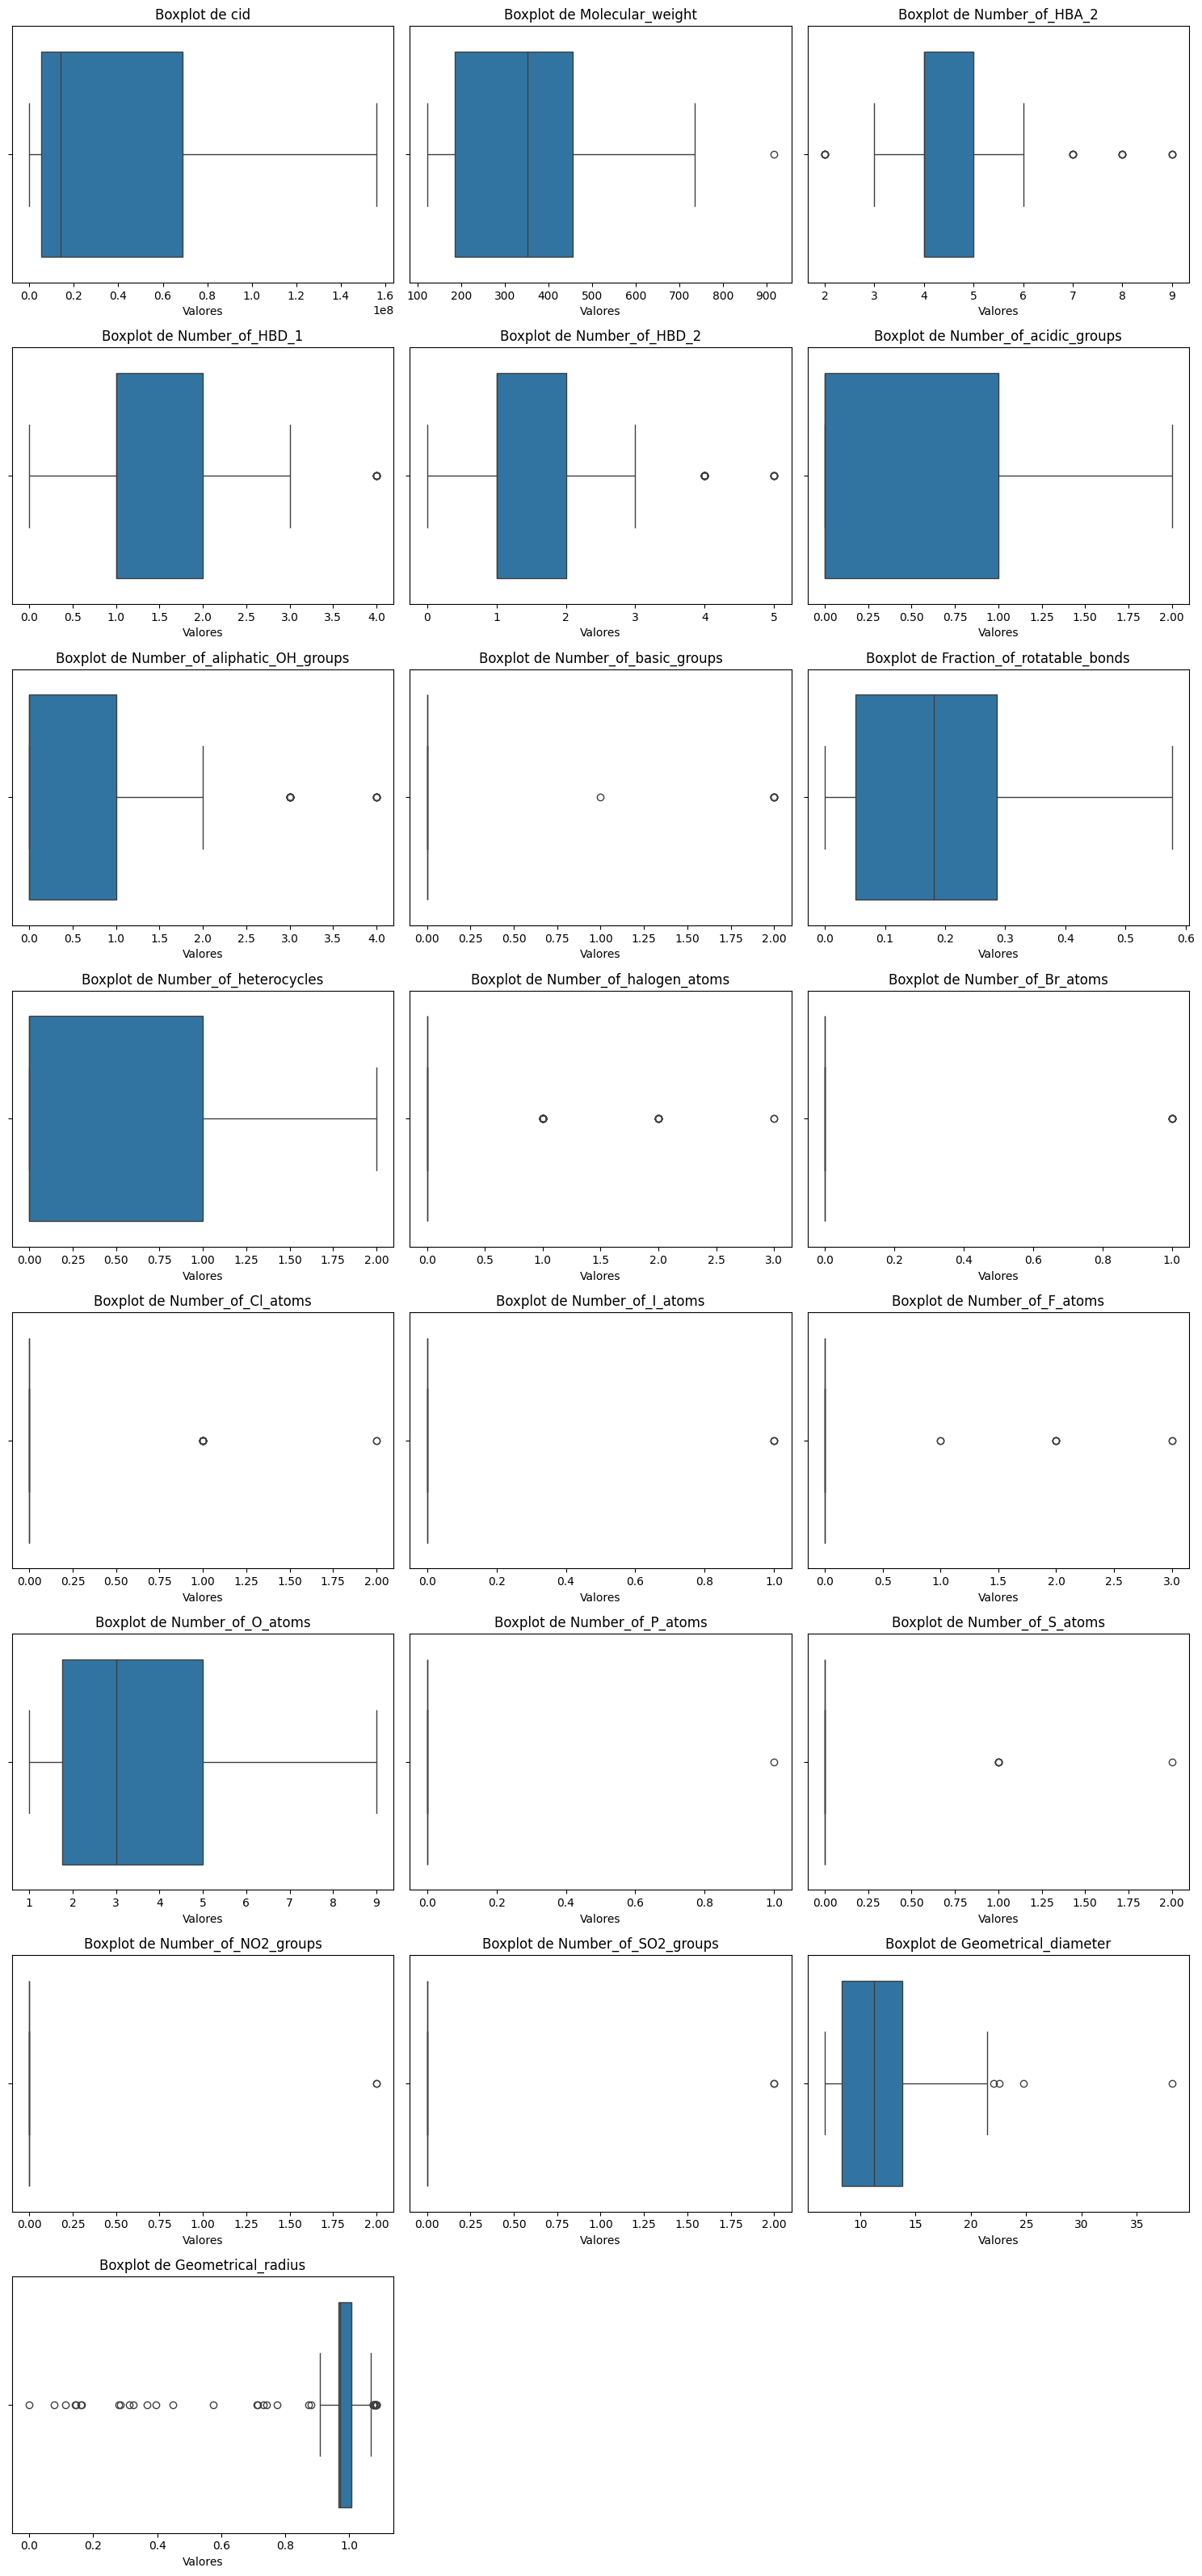

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que df2 es tu DataFrame
num_cols = len(df2.columns)
num_rows = int(np.ceil(num_cols / 3))  # Calcular el número de filas necesario
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 4*num_rows))

# Aplanar el arreglo de ejes para iterar más fácilmente
axs = axs.flatten()

for i, column in enumerate(df2.columns):
    sns.boxplot(x=df2[column], ax=axs[i])
    axs[i].set_title(f'Boxplot de {column}')
    axs[i].set_xlabel('Valores')
    axs[i].set_ylabel('')

# Ocultar ejes sobrantes si no se usan
for j in range(i+1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()  # Ajustar el espacio entre los subgráficos
plt.show()


In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   Number_of_HBA_2                300 non-null    int64  
 3   Number_of_HBD_1                300 non-null    int64  
 4   Number_of_HBD_2                300 non-null    int64  
 5   Number_of_acidic_groups        300 non-null    int64  
 6   Number_of_aliphatic_OH_groups  300 non-null    int64  
 7   Number_of_basic_groups         300 non-null    int64  
 8   Fraction_of_rotatable_bonds    300 non-null    float64
 9   Number_of_heterocycles         300 non-null    int64  
 10  Number_of_halogen_atoms        300 non-null    int64  
 11  Number_of_Br_atoms             300 non-null    int64  
 12  Number_of_Cl_atoms             300 non-null    int

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   Number_of_HBA_2                300 non-null    int64  
 3   Number_of_HBD_1                300 non-null    int64  
 4   Number_of_HBD_2                300 non-null    int64  
 5   Number_of_acidic_groups        300 non-null    int64  
 6   Number_of_aliphatic_OH_groups  300 non-null    int64  
 7   Number_of_basic_groups         300 non-null    int64  
 8   Fraction_of_rotatable_bonds    300 non-null    float64
 9   Number_of_heterocycles         300 non-null    int64  
 10  Number_of_halogen_atoms        300 non-null    int64  
 11  Number_of_Br_atoms             300 non-null    int64  
 12  Number_of_Cl_atoms             300 non-null    int

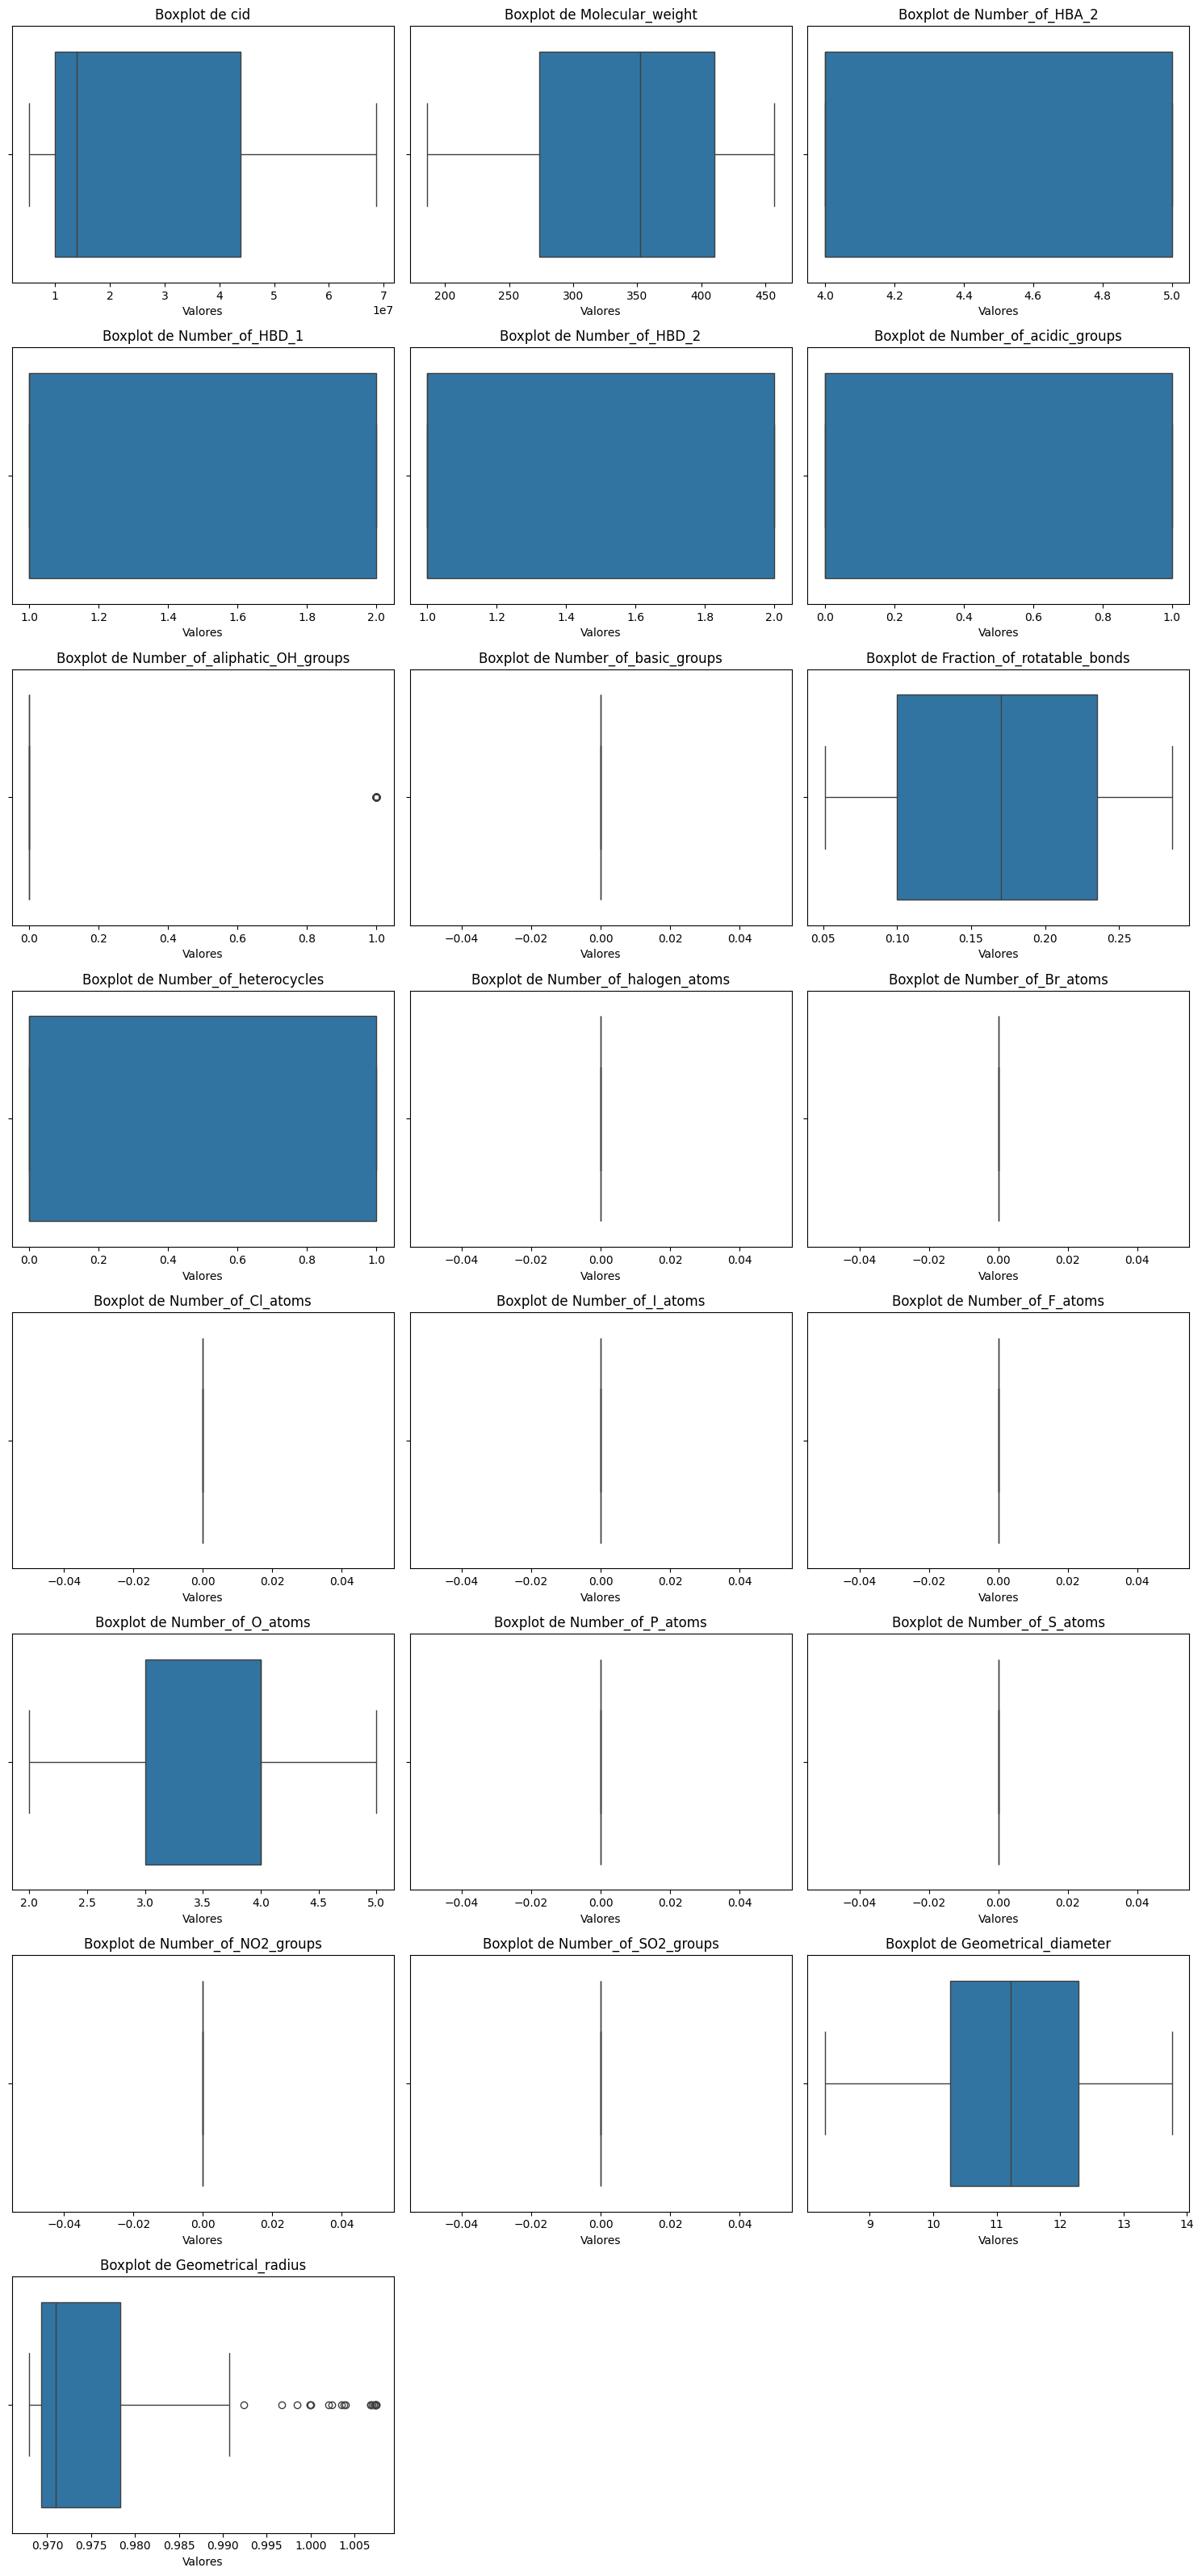

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que df2 es tu DataFrame
num_cols = len(df3.columns)
num_rows = int(np.ceil(num_cols / 3))  # Calcular el número de filas necesario
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 4*num_rows))

# Aplanar el arreglo de ejes para iterar más fácilmente
axs = axs.flatten()

for i, column in enumerate(df3.columns):
    sns.boxplot(x=df3[column], ax=axs[i])
    axs[i].set_title(f'Boxplot de {column}')
    axs[i].set_xlabel('Valores')
    axs[i].set_ylabel('')

# Ocultar ejes sobrantes si no se usan
for j in range(i+1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()  # Ajustar el espacio entre los subgráficos
plt.show()


In [99]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,300.0,3.601528e+07,4.067521e+07,1046.000000,5.281500e+06,1.388871e+07,6.880700e+07,1.560257e+08
Molecular_weight,300.0,3.348073e+02,1.429548e+02,122.115432,1.858750e+02,3.523860e+02,4.567110e+02,9.176300e+02
Number_of_HBA_2,300.0,4.460000e+00,1.224772e+00,2.000000,4.000000e+00,4.000000e+00,5.000000e+00,9.000000e+00
Number_of_HBD_1,300.0,1.433333e+00,8.648983e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
Number_of_HBD_2,300.0,1.493333e+00,1.169551e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Number_of_acidic_groups,300.0,3.233333e-01,5.225250e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Number_of_aliphatic_OH_groups,300.0,5.533333e-01,9.255689e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
Number_of_basic_groups,300.0,4.333333e-02,2.858811e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
Fraction_of_rotatable_bonds,300.0,1.835515e-01,1.349072e-01,0.000000,5.128205e-02,1.818182e-01,2.857143e-01,5.769231e-01
Number_of_heterocycles,300.0,3.500000e-01,4.915677e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00


In [100]:
# Suponiendo que df3 es tu DataFrame

# Calcular la desviación estándar de cada columna
std_dev = df2.std()

# Filtrar las columnas con desviación estándar igual a cero
zero_std_cols = std_dev[std_dev == 0].index

# Eliminar las columnas con desviación estándar igual a cero del DataFrame
df4 = df2.drop(zero_std_cols, axis=1)


In [104]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,300.0,3.601528e+07,4.067521e+07,1046.000000,5.281500e+06,1.388871e+07,6.880700e+07,1.560257e+08
Molecular_weight,300.0,3.348073e+02,1.429548e+02,122.115432,1.858750e+02,3.523860e+02,4.567110e+02,9.176300e+02
Number_of_HBA_2,300.0,4.460000e+00,1.224772e+00,2.000000,4.000000e+00,4.000000e+00,5.000000e+00,9.000000e+00
Number_of_HBD_1,300.0,1.433333e+00,8.648983e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
Number_of_HBD_2,300.0,1.493333e+00,1.169551e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Number_of_acidic_groups,300.0,3.233333e-01,5.225250e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Number_of_aliphatic_OH_groups,300.0,5.533333e-01,9.255689e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
Number_of_basic_groups,300.0,4.333333e-02,2.858811e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
Fraction_of_rotatable_bonds,300.0,1.835515e-01,1.349072e-01,0.000000,5.128205e-02,1.818182e-01,2.857143e-01,5.769231e-01
Number_of_heterocycles,300.0,3.500000e-01,4.915677e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00


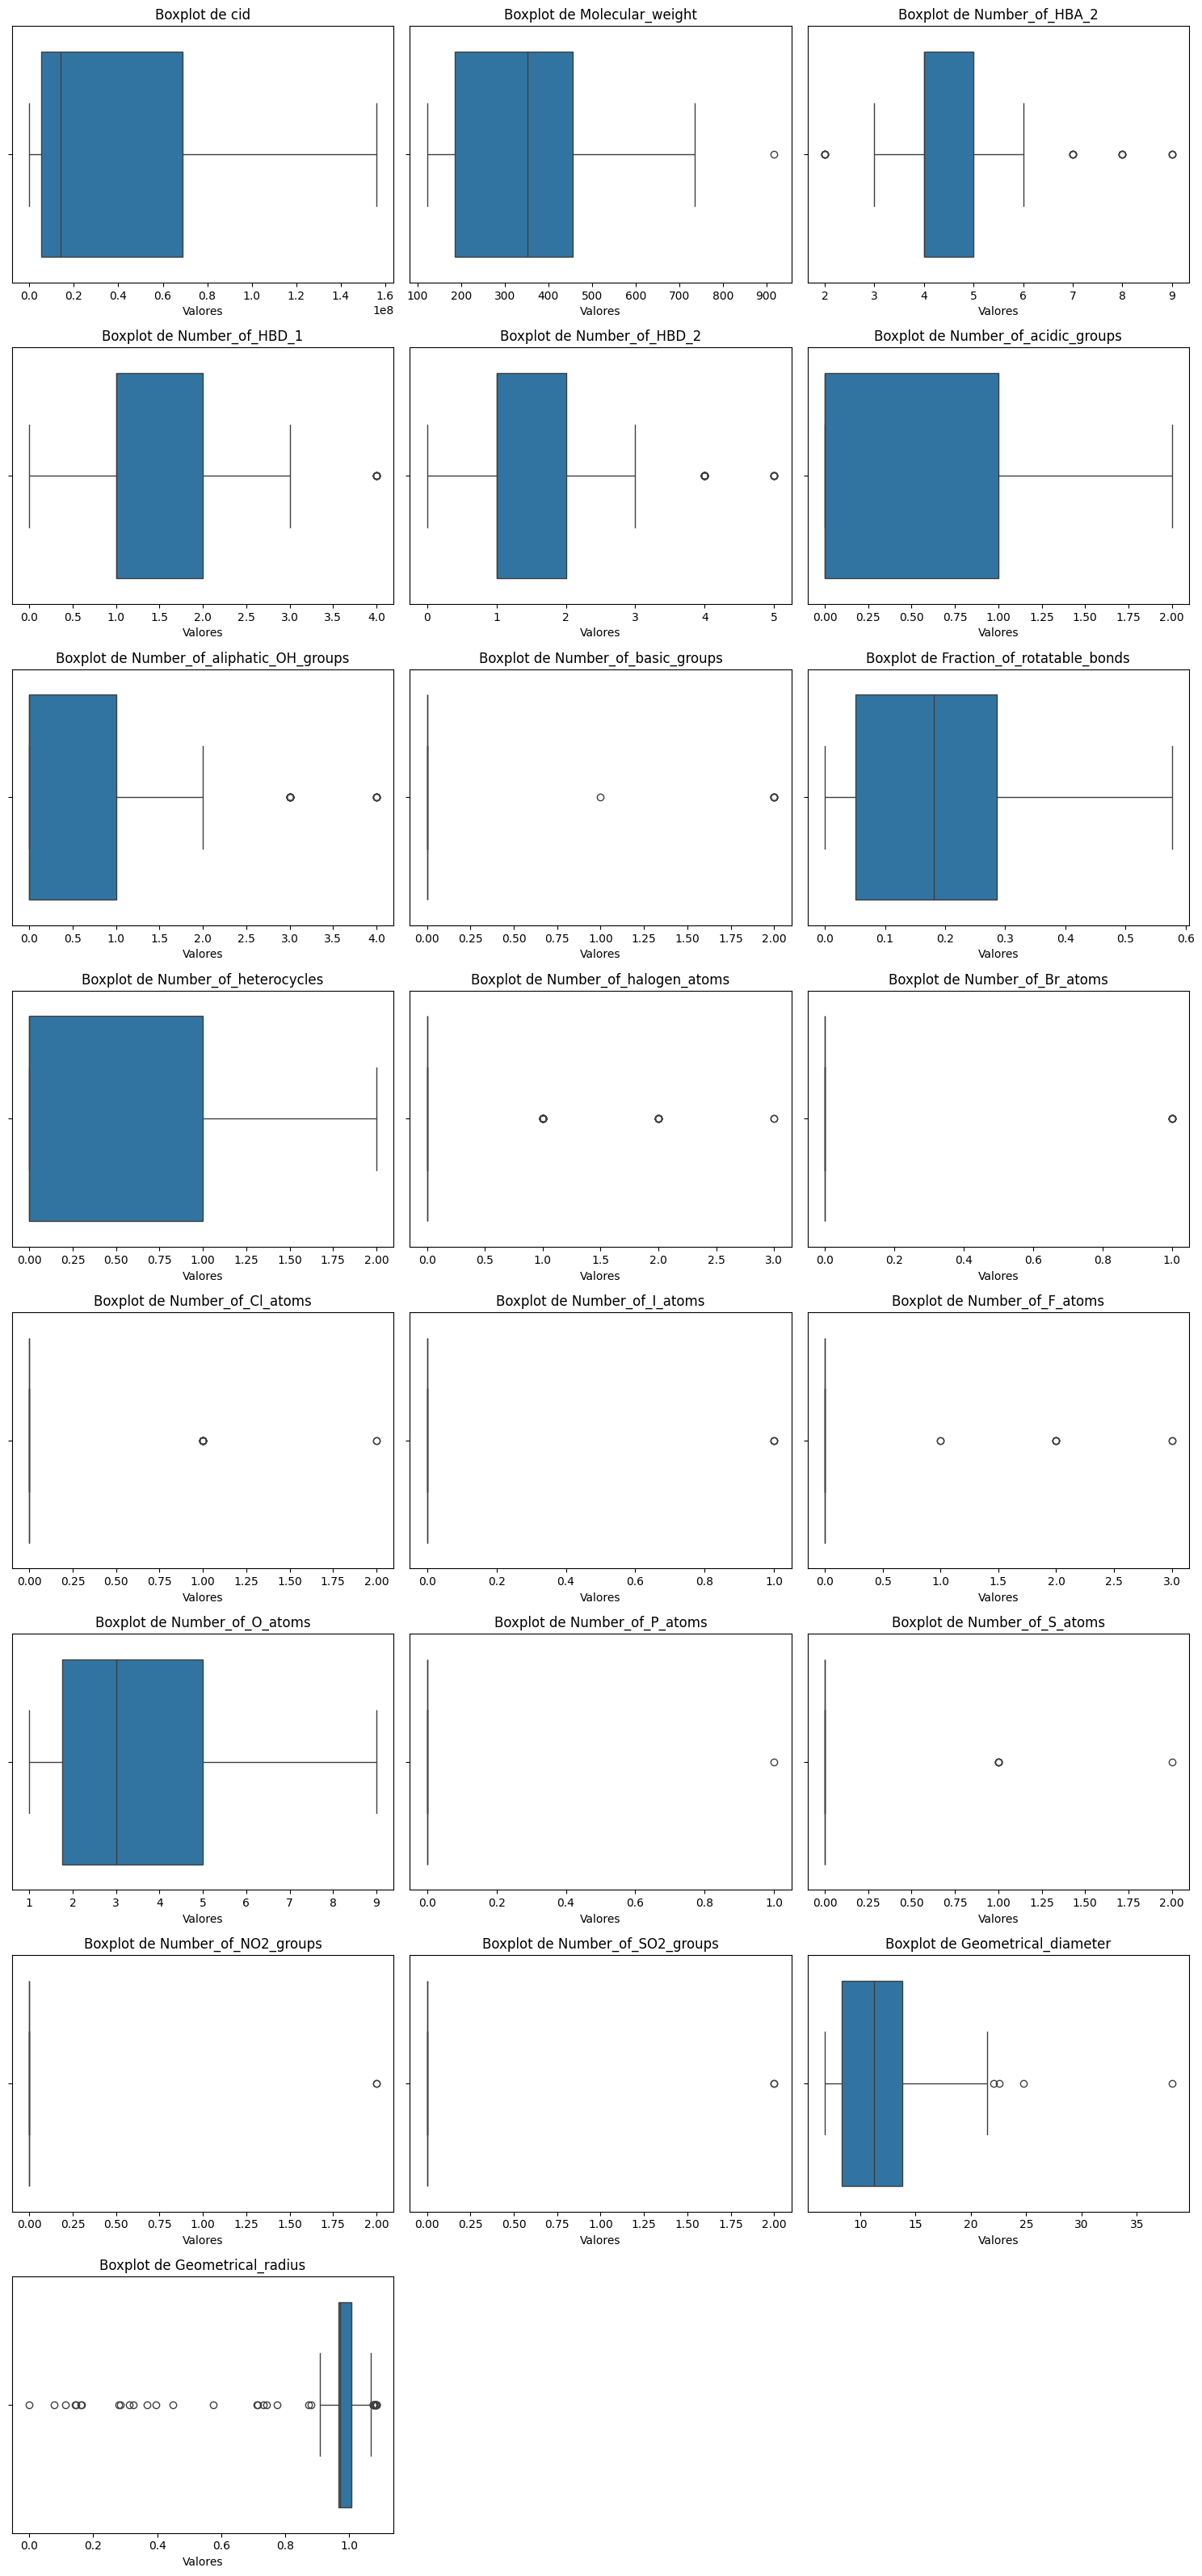

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que df2 es tu DataFrame
num_cols = len(df4.columns)
num_rows = int(np.ceil(num_cols / 3))  # Calcular el número de filas necesario
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 4*num_rows))

# Aplanar el arreglo de ejes para iterar más fácilmente
axs = axs.flatten()

for i, column in enumerate(df4.columns):
    sns.boxplot(x=df4[column], ax=axs[i])
    axs[i].set_title(f'Boxplot de {column}')
    axs[i].set_xlabel('Valores')
    axs[i].set_ylabel('')

# Ocultar ejes sobrantes si no se usan
for j in range(i+1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()  # Ajustar el espacio entre los subgráficos
plt.show()


In [106]:
# Suponiendo que df4 es tu DataFrame

# Calcular la desviación estándar de cada columna
std_dev = df4.std()

# Filtrar las columnas con desviación estándar menor a 0.75
selected_columns = std_dev[std_dev >= 0.75].index

# Crear un nuevo DataFrame solo con las columnas seleccionadas
df5 = df4[selected_columns]

# df4_filtered ahora contiene solo las columnas con desviación estándar mayor o igual a 0.75


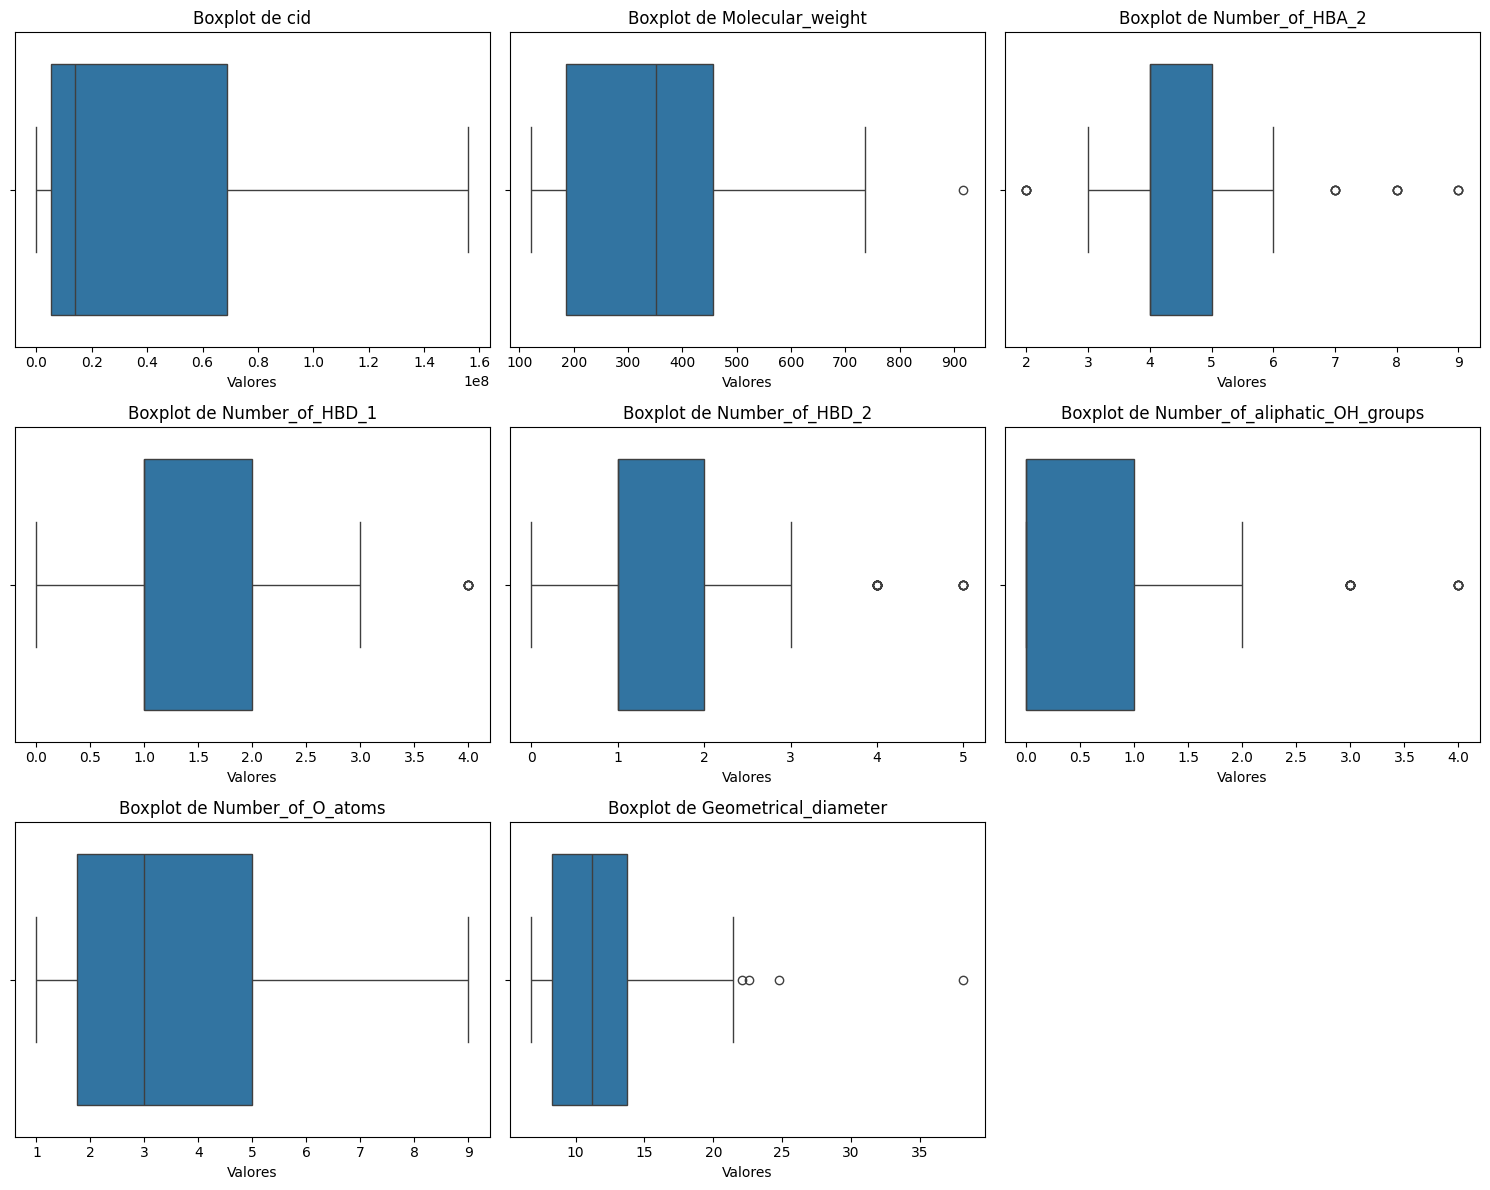

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que df2 es tu DataFrame
num_cols = len(df5.columns)
num_rows = int(np.ceil(num_cols / 3))  # Calcular el número de filas necesario
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 4*num_rows))

# Aplanar el arreglo de ejes para iterar más fácilmente
axs = axs.flatten()

for i, column in enumerate(df5.columns):
    sns.boxplot(x=df5[column], ax=axs[i])
    axs[i].set_title(f'Boxplot de {column}')
    axs[i].set_xlabel('Valores')
    axs[i].set_ylabel('')

# Ocultar ejes sobrantes si no se usan
for j in range(i+1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()  # Ajustar el espacio entre los subgráficos
plt.show()


In [108]:
df6 = df5.drop("cid", axis=1)


USAMOS PCA

In [109]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Molecular_weight               300 non-null    float64
 1   Number_of_HBA_2                300 non-null    int64  
 2   Number_of_HBD_1                300 non-null    int64  
 3   Number_of_HBD_2                300 non-null    int64  
 4   Number_of_aliphatic_OH_groups  300 non-null    int64  
 5   Number_of_O_atoms              300 non-null    int64  
 6   Geometrical_diameter           300 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 16.5 KB


In [110]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Suponiendo que df6 es tu DataFrame

# Estandarizar los datos
scaler = StandardScaler()
df6_standardized = scaler.fit_transform(df6)

# Aplicar PCA con solo dos componentes principales
pca = PCA(n_components=2)
df6_pca = pca.fit_transform(df6_standardized)

# Ahora df6_pca contiene las dos componentes principales transformadas

# Visualizar la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(explained_variance_ratio)

# También puedes acceder a las componentes principales
principal_components = pca.components_
print("\nComponentes principales:")
print(principal_components)


Varianza explicada por cada componente principal:
[0.51228454 0.21093856]

Componentes principales:
[[ 0.41653747  0.22150863  0.32334     0.46709719  0.39189721  0.44451965
   0.32174645]
 [ 0.44314116 -0.38795891 -0.54508434 -0.18260174 -0.12300926  0.07743966
   0.54911318]]


Ahora aplicamos Kmeans

In [112]:
from sklearn.cluster import KMeans

# Aplicar K-means a las componentes principales
kmeans = KMeans(n_clusters=3, random_state=42)  # Por ejemplo, con 3 clústeres
kmeans.fit(df6_pca)

# Obtener las etiquetas de los clústeres y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Imprimir las etiquetas de los clústeres
print("Etiquetas de los clústeres:")
print(labels)

# Imprimir las coordenadas de los centroides
print("\nCoordenadas de los centroides:")
print(centroids)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Etiquetas de los clústeres:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2 0 2 0 2 2 2 2 2 0 2 0 0 0 0 2 2 2 0 0 2 0
 2 2 2 0 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 0 0 0 2 2 2 2 2 0 0 0 2 2 0 0 0 0 2
 2 2 2 2 2 0 0 2 2 2 0 2 2 0 0 0 2 1 1 0 0 0 0 2 2 0 2 2 2 0 2 2 1 2 2 2 1
 2 2 0 2 0 2 2 2 2 2 2 0 2 0 2 2 1 0 1 0 0 2 2 2 0 2 2 2 1 2 2 2 1 2 1 2 0
 2 1 2 2 0 2 2 2 2 2 0 2 1 0 1 1 1 0 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 2 2 0 2
 0 2 0 2]

Coordenadas de los centroides:
[[ 2.59061579 -0.78436489]
 [-1.91833803 -0.60473898]
 [ 0.34126323  1.02245644]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

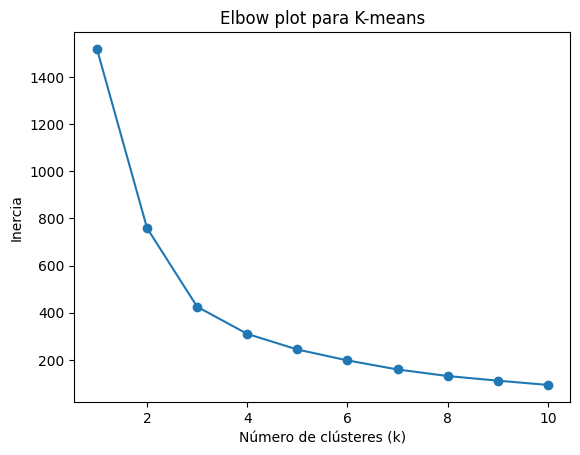

In [114]:
import matplotlib.pyplot as plt

# Calcular la inercia para diferentes valores de k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df6_pca)
    inertia.append(kmeans.inertia_)

# Visualizar el elbow plot
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.title('Elbow plot para K-means')
plt.show()


PODEMOS VER QUE EN UNA PENDIENTE MÁS PRONUNCIADA ES DONDE NOS COMBIENE, EN ESTE CASO PARA UN NÚMERO DE CLUSTERS IGUAL A 2 O 3

Text(0, 0.5, 'Cluster label')

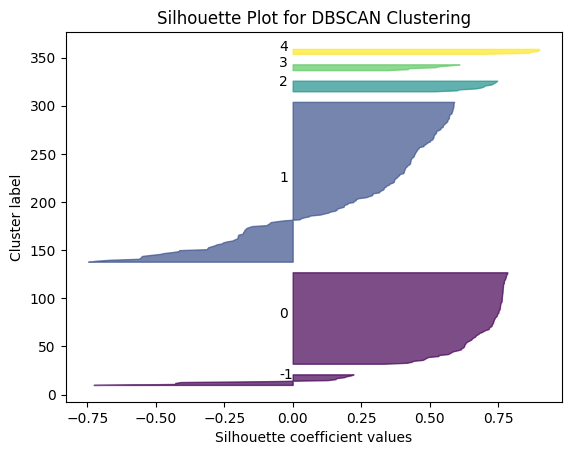

In [118]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Calcular el valor de silhouette para cada punto de datos
silhouette_vals = silhouette_samples(df6_pca, labels)

# Calcular el valor medio de silhouette para todos los puntos
average_silhouette = silhouette_score(df6_pca, labels)

# Crear una figura y un subplot
fig, ax = plt.subplots()

# Configurar el rango de valores de silhouette
y_lower = 10
for i in np.unique(labels):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + cluster_silhouette_vals.shape[0]

    # Colorear los puntos en función de sus valores de silhouette
    color = plt.cm.viridis(float(i) / np.max(labels))
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

    # Etiquetar los clústeres en el gráfico
    ax.text(-0.05, y_lower + 0.5 * cluster_silhouette_vals.shape[0], str(i))

    # Actualizar el límite inferior para el próximo cluster
    y_lower = y_upper + 10  # 10 for the 0 samples

# Configurar los límites y etiquetas del gráfico
ax.set_title("Silhouette Plot for DBSCAN Clustering")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# Línea vertical para el valor


Ahora dbscan

In [113]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN a las componentes principales
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Parámetros eps y min_samples pueden variar según tus datos
dbscan.fit(df6_pca)

# Obtener las etiquetas de los clústeres
labels = dbscan.labels_

# Imprimir las etiquetas de los clústeres
print("Etiquetas de los clústeres:")
print(labels)


Etiquetas de los clústeres:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  4
  1  1  2  1  1  1  1  1  1  1  1  1 -1 -1 -1  2  1  1  2  2  3  1  1  1
  2  4 -1  3  1  1  1  2  2  1  1  1  1  1  1  1  1  1  4  1  1  4  1  3
  2  4  1  1  1  1  1  1  4  3  1  1  1  2  1  1 -1 -1  1 -1  1 -1  1  1
  1  1  1  1 -1  1  1  2  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3
  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  1  1  1  1  1]


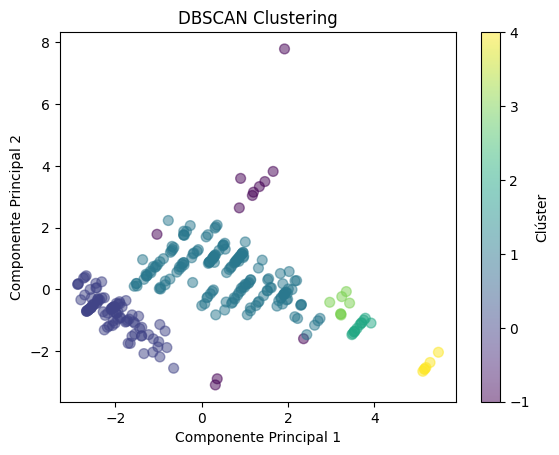

In [117]:
import matplotlib.pyplot as plt

# Suponiendo que df6_pca es tu DataFrame después de aplicar PCA
# Suponiendo que labels contiene las etiquetas de los clústeres asignadas por DBSCAN

# Visualizar los clústeres detectados por DBSCAN en un gráfico
plt.scatter(df6_pca[:, 0], df6_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Clúster')
plt.show()


2. ¿Cuántas dimensiones son requeridas para preservar el 95% de la varianza?



In [116]:
from sklearn.decomposition import PCA

# Suponiendo que df6 es tu DataFrame

# Estandarizar los datos
scaler = StandardScaler()
df6_standardized = scaler.fit_transform(df6)

# Inicializar PCA
pca = PCA()
pca.fit(df6_standardized)

# Calcular el número de dimensiones necesarias para preservar el 95% de la varianza
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
n_dimensions = np.argmax(explained_variance_ratio_cumulative >= 0.95) + 1

print("Número de dimensiones requeridas para preservar el 95% de la varianza:", n_dimensions)


Número de dimensiones requeridas para preservar el 95% de la varianza: 5
